In [11]:
import datetime
import pandas as pd
import numpy as np
import time as tm
# import xgboost as xg

time = datetime.date(2017,8,9)

print(time)
print(type(time))

time2 = tm.strptime("2017-08-08","%Y-%m-%d")
print(type(time2))
print(time2)
print(time2.tm_year)

# print "{0} {1} 01".format('2018','02')

2017-08-09
<class 'datetime.date'>
<class 'time.struct_time'>
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=8, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=220, tm_isdst=-1)
2017


In [15]:
import datetime
import pandas as pd
import numpy as np

%matplotlib inline

# Sales Data
all_data_file = "./data/train.csv"
data = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                  parse_dates=['Date'])
# Format Sales data
data.drop(['DayOfWeek'],axis = 1, inplace = True)
data.fillna('0')

print(data.head(2))

print(data.columns[1])

   Store       Date  Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
0      1 2015-07-31   5263        555     1      1            0              1
1      2 2015-07-31   6064        625     1      1            0              1
Date


D:\DevTools\Anaconda3\envs\py2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Index([u'Store', u'Date', u'Sales'], dtype='object')
            Store   Sales
Date                     
2013-01-31    2.0  115171
2013-02-28    2.0  111114


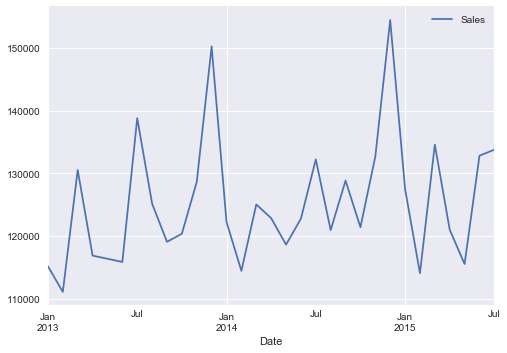

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data.sort_values("Date", ascending= True)

def select_data(store_id):
    data2 = data[data.Store == store_id]
    #print(data2)
    simple_data = data2.drop(['Customers','Open','Promo','SchoolHoliday','StateHoliday'], axis =1)
    print(simple_data.columns)
    date_col = simple_data['Date']
    simple_data.index = date_col
    simple_data = simple_data.resample('M').sum() 
    #reset store id
    store_number = np.empty(len(simple_data['Sales']))
    store_number.fill(store_id)
    simple_data['Store'] = store_number
    return simple_data


simple_data = select_data(2)
print(simple_data.head(2))
simple_data.plot(kind='line',x=simple_data.index,y='Sales')


Index([u'Store', u'Date', u'Sales'], dtype='object')
Index([u'Store', u'Date', u'Sales'], dtype='object')


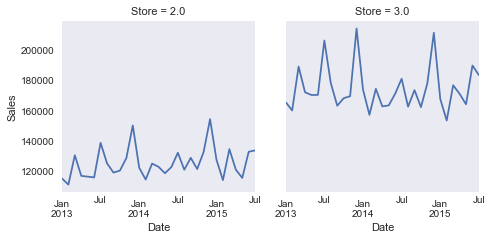

In [4]:
plot_datas = pd.DataFrame({'Sales':[],'Date':[]})
#plot_datas.index = plot_datas['Date']

simple_data_2 = select_data(2)
simple_data_2.reset_index(inplace = True)
#print(simple_data_2)

simple_data_3 = select_data(3)
simple_data_3.reset_index(inplace = True)
#print(simple_data_3)

plot_datas = plot_datas.append(simple_data_2)
plot_datas = plot_datas.append(simple_data_3)

#print(plot_datas)

plot_datas.sort_values("Date", ascending= True,inplace= True)
#print(plot_datas)


def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
    
g = sns.FacetGrid(plot_datas, col="Store", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "Date", "Sales")

def temp():
    simple_data_expend = simple_data.reset_index()
    store_number = np.empty(len(simple_data_expend['Date']))
    store_number.fill(np.int(3.9))
    print(type(store_number[1]))
    simple_data_expend['Store'] = store_number
    plot_datas = plot_datas.append(simple_data_expend)
    print(plot_datas)

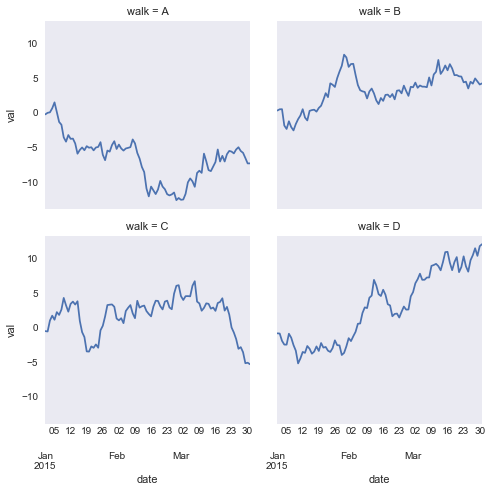

In [5]:
import pandas as pd
df = pd.DataFrame(
    data=np.random.randn(90, 4),
    columns=pd.Series(['A','B','C','D'], name="walk"),
    index=pd.date_range("2015-01-01", "2015-03-31",
      name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")
#print(df)
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "date", "val")

## SARIMAX prediction

In [152]:
import numpy
import pandas as pd

daily_sales = pd.read_csv("./data/train.csv")
daily_sales = daily_sales[daily_sales.Store == 50]
data = pd.DataFrame({'Sales':[],'Date':[]})
data['Sales'] = daily_sales['Sales']
data['Date'] = daily_sales['Date']
# data['Open'] = daily_sales['Open']

data.sort_values("Date", ascending= True, inplace= True)
#data.reset_index(inplace = True)

print(data.head(2))

max_log_y = numpy.max(numpy.log(data['Sales']))

def val_for_fit(val):
    val = numpy.log(val) / max_log_y
    return val

# data['Sales'] = val_for_fit(data['Sales'])

data.set_index(['Date'], inplace=True, drop=True)
data.index.name=None

print(data.tail(2))
print(len(data))

               Date  Sales
1016144  2013-01-01      0
1015029  2013-01-02   3804
            Sales
2015-07-30   5324
2015-07-31   5729
942


D:\DevTools\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\DevTools\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [153]:
import numpy as np

# data = data[0:600]
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data.fillna(0, inplace = True)
print(data.head(3))
print(data.tail(3))
print(len(data))


data.index = pd.to_datetime(data.index)

print(type(data))
#　ｒｅｓａｍｐｌｅ　
data = data.resample('MS').mean()
print(data.tail(2))

            Sales
2013-01-01      0
2013-01-02   3804
2013-01-03   3388
            Sales
2015-07-29   4946
2015-07-30   5324
2015-07-31   5729
942
<class 'pandas.core.frame.DataFrame'>
                  Sales
2015-06-01  4009.566667
2015-07-01  3972.032258


2013-01-01    3197.838710
2013-02-01    3342.571429
Freq: MS, Name: Sales, dtype: float64
2015-03-01    4516.904494
2015-04-01    2590.633401
2015-05-01    4758.942035
2015-06-01    2285.774462
2015-07-01    5609.805466
Freq: MS, dtype: float64


D:\DevTools\Anaconda3\envs\py3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\DevTools\Anaconda3\envs\py3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2773: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


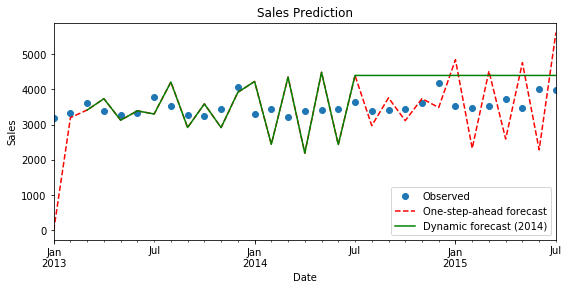

In [179]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm

%matplotlib inline

#def test_final_output():
# data = pd.DataFrame({'Sales':[199,100,222,240],
#                      'Date':['2013-02-01','2013-03-02','2013-08-26','2014-02-01'],
#                     'Open':[1,1,0,1]})
#data = pd.DataFrame({'Sales':[199,100,222]})
# data['Sales'] = daily_sales['Sales']
# data['Date'] = daily_sales['Date']
# data['Store'] = daily_sales['Store']
# data = data[data.Store == 6]
# data.sort_values("Date", ascending= True, inplace= True)
# data.reset_index(inplace = True)

# df = data
# nobs=len(df)
#pd.index = pd.to_datetime(df['Date'])

# data.set_index(['Date'], inplace=True)
# data.index.name=None

# df.index.name=None
# df.reset_index(inplace=True)
# start = datetime.datetime.strptime("2017-06-01", "%Y-%m-%d")
# date_list = [start + relativedelta(months=x) for x in range(0,3)]
# print(date_list)
# df['index'] = date_list
# df.columns= ['riders']
# df['riders'] = df.riders.apply(lambda x: int(x)*100)

# Variable
# endog = data.loc['2013':, 'Sales']
# exog = sm.add_constant(data.loc['2013':, 'm2'])
# nobs = endog.shape[0]

# mod = sm.tsa.statespace.SARIMAX(df.Sales, trend='c', order=(1,0,1))
# # mod = sm.tsa.statespace.SARIMAX(df.Sales, trend='n')
# results = mod.fit(trend='c', disp=False,transparams=True)

# print(results.summary())

# start = datetime.datetime.strptime("2014-05-16", "%Y-%m-%d")
# date_list = [start + relativedelta(months=x) for x in range(0,5)]
# future = pd.DataFrame(index=date_list, columns= df.columns)
# df = pd.concat([df, future])
# # print(df.head(3))

# df['forecast'] = results.predict(start = 1, dynamic= True)
# df[['Sales', 'forecast']].ix[-100:].plot(figsize=(12, 8))
# print (df.forecast/100)

# res = mod.filter(results.params)

# predict = results.get_prediction()
# predict_ci = predict.conf_int()
# print(predict_ci)


# Variables
endog = data.loc['2013-01-01':, 'Sales']
exog = sm.add_constant(data.loc['2013-01-01':, 'Sales'])
nobs = endog.shape[0]

print(endog.head(2))

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'2015-01-01'], exog=exog.loc[:'2015-01-01'], order=(1,0,1),
                                enforce_stationarity=False, trend = 't')
fit_res = mod.fit(disp=False)
# print(fit_res.summary())

# fit_res.plot_diagnostics(figsize=(15, 12))
# plt.show()

mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)

# print("params:")
# print(fit_res.params)

# predicted = mod.predict(fit_res.params, exog=exog.loc['2015-01-01':])
# print("Predicted:")
# print(predicted)

# reset data for test
def dummy_value(x):
    pass

orig = data.copy()

# for idx,row in orig.iterrows():
#    if idx > pd.Timestamp('2014-07-01'):
#        row['Sales'] = 0.0


# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()


# Dynamic predictions
predict_dy = res.get_prediction(start = 2, dynamic='2014-07-01')
predict_dy_ci = predict_dy.conf_int()

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Sales Prediction', xlabel='Date', ylabel='Sales')

# Plot data points
orig.loc['2013-01-01':, 'Sales'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2013-01-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
# ci = predict_ci.loc['1977-07-01':]
# ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['2013-01-01':].plot(ax=ax, style='g', label='Dynamic forecast (2014)')

print(predict.predicted_mean.tail(5))

# ci = predict_dy_ci.loc['1977-07-01':]
# ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

one-step-ahead mean error:
-91.9218958118
Dynamic mean error:
318.572006091


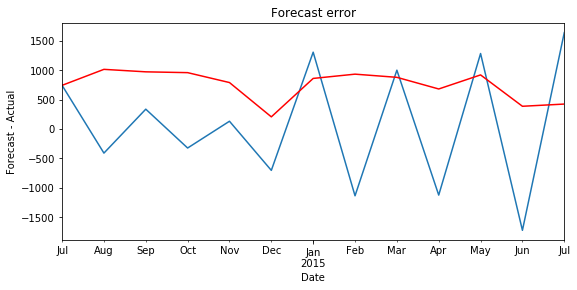

In [180]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc['2014-07-01':].plot(ax=ax, label='One-step-ahead forecast')
print("one-step-ahead mean error:")
print(predict_error.mean())

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['2014-07-01':].plot(ax=ax, style='r', label='Dynamic forecast')
print("Dynamic mean error:")
print(predict_dy_error.mean())

## ARIMA模型

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import welch
import operator

daily_sales = pd.read_csv("./data/train.csv")
daily_sales = daily_sales[daily_sales.Store == 20]
data = pd.DataFrame({'Sales':[],'Date':[]})
data['Sales'] = daily_sales['Sales']
data['Date'] = daily_sales['Date']
# data['Store'] = daily_sales['Store']

data.sort_values("Date", ascending= True, inplace= True)
data = data[0:100]
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data.fillna(0, inplace = True)


# data = pd.DataFrame({'Sales':[199,100,222],'Date':['2017-06-01','2017-07-29','2017-08-26']})

data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Date'], inplace=True)
data.index.name=None

def plotmean(timeseries, show=0, path=''):
    rolmean = pd.rolling_mean(timeseries, window=2)
    
    print(rolmean.head(2))
    
    rolstd = pd.rolling_std(timeseries, window=2)
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Observed scores')
    mean = plt.plot(rolmean, color='red', label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling SD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    if show != 0:
        plt.show()
    if path != '':
        plt.savefig(path, format='png', bbox_inches='tight')
    plt.clf()
    
# print(type(data.iloc[0,0]))
plotmean(data, show=1)

In [ ]:
def runwelch(dta, show, path = ''):
    nps = (len(dta) / 2) + 8
    nov = nps / 2
    fft = nps
    fs_temp = .0002778
    # Set to 1/3600 because of hourly sampling
    f, Pxx_den = welch(dta, fs=fs_temp, nperseg=nps, noverlap=nov, nfft=fft, scaling="spectrum")
    plt.plot(f, Pxx_den)
    plt.ylim([0.5e-7, 10])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    if show != 0:
        plt.show()
    if path != '':
        plt.savefig(path, format='png', bbox_inches='tight')
    plt.clf()
    return f, Pxx_den

runwelch(data, 1)

## Online example

http://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

In [88]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

# # Dataset
# wpi1 = requests.get('http://www.stata-press.com/data/r12/wpi1.dta').content
# data = pd.read_stata(BytesIO(wpi1))
# data.index = data.t

# print(data.head(2))

# # Fit the model
# mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
# res = mod.fit(disp=False)
# print(res.summary())


# # Dataset
# air2 = requests.get('http://www.stata-press.com/data/r12/air2.dta').content
# data = pd.read_stata(BytesIO(air2))
# data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
# data['lnair'] = np.log(data['air'])

# print(data.head(3))

# # Fit the model
# mod = sm.tsa.statespace.SARIMAX(data['lnair'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
# res = mod.fit(disp=False)
# print(res.summary())

# Dataset
friedman2 = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content
raw = pd.read_stata(BytesIO(friedman2))
raw.index = raw.time
data = raw.loc[:'1981']

print(data.tail(5))

# Variables
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])
nobs = endog.shape[0]

# print(endog.loc[:'1978-01-01'].tail(2))
# print(exog.head(2))

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

                     m2       time          m1      consump         pc92
time                                                                    
1980-10-01  1601.099976 1980-10-01  408.920013  1836.800049  3034.199951
1981-01-01  1638.000000 1981-01-01  418.920013  1890.300049  3045.600098
1981-04-01  1670.550049 1981-04-01  423.899994  1923.500000  3045.800049
1981-07-01  1708.380005 1981-07-01  427.910004  1967.400024  3058.800049
1981-10-01  1756.189941 1981-10-01  436.790009  1983.900024  3035.300049
                           Statespace Model Results                           
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Mon, 28 Aug 2017   AIC                            496.633
Time:                        15:57:28   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
               

D:\DevTools\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\DevTools\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


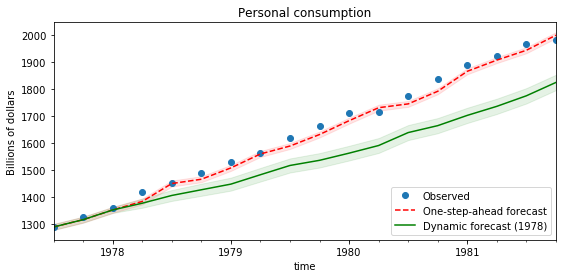

In [41]:
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)


# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()


# Dynamic predictions
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: DeprecationWarning: 
.ix is deprecated. Pl

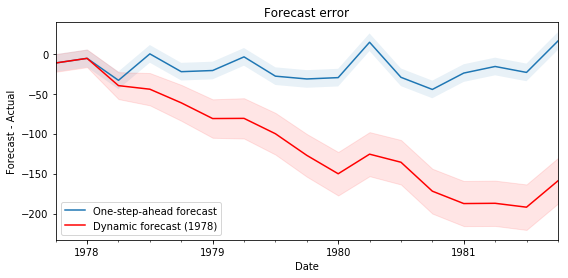

In [49]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.ix['1977-10-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.ix['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.ix['1977-10-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.ix['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

## Grouping

In [14]:
# Sales Data
import pandas as pd

store_data = "./data/store.csv"
store = pd.read_csv(store_data)
store.fillna('0',inplace = True)

store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(int)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(int)

# store['comp_date_start'] = pd.to_datetime(store['CompetitionOpenSinceYear'],store['CompetitionOpenSinceMonth'])

# store['comp_date_start'] = pd.to_datetime('2017', '9','1')


print(store.head(2))

def find_store_info(store_id):
    store_info = store.loc[store['Store'] == store_id]
    return store_info.iloc[0,1],store_info.iloc[0,2]
    
print(type(find_store_info(2)))
a,b = find_store_info(1)
print(a)
print(b)

   Store StoreType Assortment CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                1270                          9   
1      2         a          a                 570                         11   

   CompetitionOpenSinceYear  Promo2 Promo2SinceWeek Promo2SinceYear  \
0                      2008       0               0               0   
1                      2007       1              13            2010   

     PromoInterval  
0                0  
1  Jan,Apr,Jul,Oct  
<class 'tuple'>
c
a


In [18]:
data['StoreType'] = np.empty(len(data['Sales']))
data['Assortment'] = np.empty(len(data['Sales']))
data['CD'] = np.empty(len(data['Sales']))

print(data.head(2))

def set_cd(store_id, data):
    store_info = store.loc[store['Store'] == store_id]
    c_year = store_info['CompetitionOpenSinceYear']
    c_month = store_info['CompetitionOpenSinceMonth']
    dt = datetime.strptime(record['Date'], '%Y-%m-%d')
    year = dt.year
    month = dt.month
    if year < c_year and month < c_month:
        return 0
    return store['CompetitionDistance']

for index, row in data.iterrows():
    store_id = data.iloc[index,0]
    data.iloc[index,10] = set_cd(store_id)
    st,am = find_store_info(store_id, row)
    data.iloc[index,8] = st
    data.iloc[index,9] = am
    
print(data.head(2))

   Store       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1 2015-07-31   5263        555     1      1            0   
1      2 2015-07-31   6064        625     1      1            0   

   SchoolHoliday      StoreType     Assortment             CD  
0              1  1.624165e-212  1.624165e-212  1.624165e-212  
1              1  1.624165e-212  1.624165e-212  1.624165e-212  


TypeError: set_cd() missing 1 required positional argument: 'data'

In [1]:
import numpy as np
data = np.random.random(size=(6, 4))
print((data))

labels = np.random.randint(10, size=(6, 1))
print(labels)

print(data[0])
data_x = []
data_x.append(data[0])
data_x.append(data[2])
print((data_x))
#data_x = np.array(data_x)
print(np.array(data_x))

sample = np.random.randint(4, size=2)

sample_x = data[sample,:]

print(sample_x)

print("slice")
print(data[3:1:-1])

[[ 0.17256588  0.23736748  0.7171197   0.14256002]
 [ 0.92628346  0.50152997  0.64573228  0.23645191]
 [ 0.76649985  0.82109926  0.70839826  0.22050566]
 [ 0.1201119   0.45526316  0.7900937   0.10431284]
 [ 0.25329893  0.39061701  0.48068958  0.29947268]
 [ 0.70059037  0.7484728   0.97464236  0.915937  ]]
[[2]
 [4]
 [6]
 [5]
 [4]
 [2]]
[ 0.17256588  0.23736748  0.7171197   0.14256002]
[array([ 0.17256588,  0.23736748,  0.7171197 ,  0.14256002]), array([ 0.76649985,  0.82109926,  0.70839826,  0.22050566])]
[[ 0.17256588  0.23736748  0.7171197   0.14256002]
 [ 0.76649985  0.82109926  0.70839826  0.22050566]]
[[ 0.92628346  0.50152997  0.64573228  0.23645191]
 [ 0.17256588  0.23736748  0.7171197   0.14256002]]
slice
[[ 0.1201119   0.45526316  0.7900937   0.10431284]
 [ 0.76649985  0.82109926  0.70839826  0.22050566]]


In [162]:
import pandas as pd  
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'class1'],   
            ['red', 'L', 13.5, 'class2'],   
            ['blue', 'XL', 15.3, 'class1']])    
df.columns = ['color', 'size', 'prize', 'class label']  
  
size_mapping = {  
           'XL': 3,  
           'L': 2,  
           'M': 1}  
df['size'] = df['size'].map(size_mapping)  
  
class_mapping = {label:idx for idx,label in enumerate(df['class label'].unique())}  
df['class label'] = df['class label'].map(class_mapping) 

print(df)

   color  size  prize  class label
0  green     1   10.1            0
1    red     2   13.5            1
2   blue     3   15.3            0


## Average 
https://www.kaggle.com/jerometang/a-journey-through-rossmann-stores/editnb

In [ ]:
all_data_file = "./data/train.csv"
rossmann_df = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                      parse_dates=['Date'])

In [184]:
import seaborn as sns

# Loop through each store, 
# train the model using the data of current store, and predict it's sales values.

rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))
submission   = Series()
scores       = []

for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))

    # Xgboost
    # params = {"objective": "reg:linear",  "max_depth": 10}
    # T_train_xgb = xgb.DMatrix(X_train, Y_train)
    # X_test_xgb  = xgb.DMatrix(X_test)
    # gbm = xgb.train(params, T_train_xgb, 100)
    # Y_pred = gbm.predict(X_test_xgb)
    
    # append predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))

# append rows(store,date) that were closed, and assign their sales value to 0
submission = submission.append(Series(0, index=closed_store_ids))

# save to csv file
submission = pd.DataFrame({ "Id": submission.index, "Sales": submission.values})
print(submission.head(3))

NameError: name 'test_df' is not defined